<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/PraktikumMandiri/PraktikumMandiri06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [84]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [85]:
# Membaca dataset dan menampilkan dataset
df = pd.read_csv('/content/gdrive/MyDrive/Praktikum Mandiri 06/data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [86]:
# Menampilkan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [87]:
# Menampilkan statistika deskriptif
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [88]:
# cek nilai pada kolom target
df['target'].unique()

array([0, 1])

In [89]:
# Menghitung jumlah pada kolom target
df['target'].value_counts()

,count
target,
1,526
0,499


In [90]:
# Pemilihan fitur
feature_columns = ['cp', 'sex', 'ca','oldpeak', 'thal', 'slope', 'thalach', 'exang']
X = df[feature_columns]
y = df['target']

In [91]:
# Buat menampilkan baris kolom X
X.head()

,cp,sex,ca,oldpeak,thal,slope,thalach,exang
0,0,1,2,1.0,3,2,168,0
1,0,1,0,3.1,3,0,155,1
2,0,1,0,2.6,3,0,125,1
3,0,1,1,0.0,3,2,161,0
4,0,0,3,1.9,2,1,106,0


In [92]:
# Buat menampilkan baris kolom y
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [93]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [94]:
# Bangun model SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [95]:
# Evaluasi Akurasi dan Report Klasifikasi
y_pred = model.predict(X_test)
print(f"Akurasi:{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi:81.95%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       100
           1       0.77      0.91      0.84       105

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



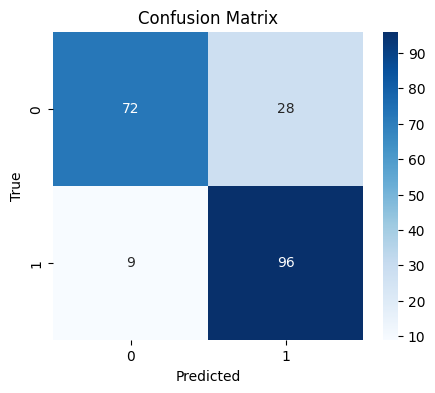

In [96]:
# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

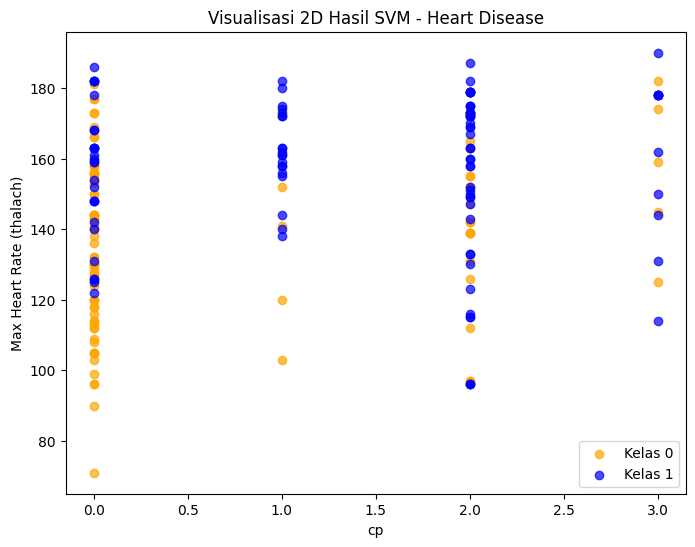

In [97]:
# Visualisasi Hasil Model SVM (2D)
plt.figure(figsize=(8,6))
for kelas, warna in zip([0,1], ['orange','blue']):
    plt.scatter(
        X_test[y_test==kelas]['cp'],
        X_test[y_test==kelas]['thalach'],
        c=warna, label=f"Kelas {kelas}", alpha=0.7
    )
plt.xlabel('cp')
plt.ylabel('Max Heart Rate (thalach)')
plt.title('Visualisasi 2D Hasil SVM - Heart Disease')
plt.legend()
plt.show()

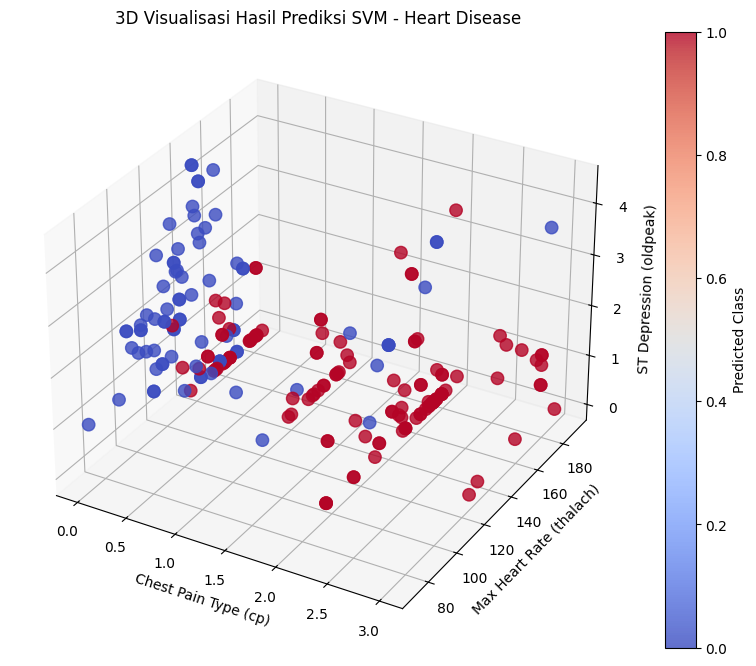

In [98]:
# 3D Visualisasi Hasil Model SVM
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    X_test['cp'],             # Fitur Tipe Nyeri Dada
    X_test['thalach'],        # Fitur Denyut Jantung Maksimal
    X_test['oldpeak'],        # Fitur Depresi ST akibat Latihan
    c=y_pred, cmap='coolwarm', s=80, alpha=0.8
)
ax.set_xlabel('Chest Pain Type (cp)')
ax.set_ylabel('Max Heart Rate (thalach)')
ax.set_zlabel('ST Depression (oldpeak)')
plt.title('3D Visualisasi Hasil Prediksi SVM - Heart Disease')
plt.colorbar(sc, label='Predicted Class')
plt.show()
